## Data set Ecommerce Delivery Analytics
### Name - Anchal Shukla , class - K23BR  , Reg.no - 12310866


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

Data Loading


In [90]:
df=pd.read_csv(r"C:\Users\Anchal\Downloads\ecommerce_delivery_analytics (1).csv")
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


data statestics

In [91]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [92]:
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


In [93]:
df.isnull().sum()
#since data is cleaned no need for cleaning

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

lets check basic relations    
1st platform with service ratings and avg delivery time

In [94]:

platform_stats=df.groupby("Platform")[["Delivery Time (Minutes)", "Service Rating"]].mean()
platform_stats

,Delivery Time (Minutes),Service Rating
Platform,,
Blinkit,29.474898,3.233844
JioMart,29.634498,3.245147
Swiggy Instamart,29.499925,3.243415


In [95]:
platform_stats=df.groupby("Platform")["Delivery Time (Minutes)"].median()
platform_stats

Platform
Blinkit             30.0
JioMart             30.0
Swiggy Instamart    29.0
Name: Delivery Time (Minutes), dtype: float64

In [96]:
platform_stats=df.groupby("Platform")["Service Rating"].median()
platform_stats
#this shows there is no specific difference in delivery time and ratings in all three apps

Platform
Blinkit             3.0
JioMart             3.0
Swiggy Instamart    3.0
Name: Service Rating, dtype: float64

2nd lets check mostly orderd product category for better understand


In [97]:
#2nd lets check mostly orderd product category for better understand
count_distinct =df["Product Category"].value_counts()
count_distinct
#dairy is the highest ordered product

Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64

Date and time are not in correct format and there are nat values so lets work on that

In [98]:

df['Order Date & Time'].head(10).tolist()
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'], format=None, dayfirst=True, errors='coerce')
df['Order Date & Time'].head()



0   2025-12-07 19:29:30
1                   NaT
2   2025-12-07 21:29:30
3   2025-12-07 19:29:30
4                   NaT
Name: Order Date & Time, dtype: datetime64[ns]

In [99]:
df = df.dropna(subset=['Order Date & Time'])

df = df.reset_index(drop=True)
df['Order Date & Time'].isna().sum()


0

In [100]:
df['Order Date & Time'].head()

0   2025-12-07 19:29:30
1   2025-12-07 21:29:30
2   2025-12-07 19:29:30
3   2025-12-07 22:29:30
4   2025-12-07 08:29:30
Name: Order Date & Time, dtype: datetime64[ns]

In [101]:
df['Order Date'] = df['Order Date & Time'].dt.date
df['Order Time'] = df['Order Date & Time'].dt.time
df['Order Hour'] = df['Order Date & Time'].dt.hour
df['Order Day'] = df['Order Date & Time'].dt.day_name()
df['Order Month'] = df['Order Date & Time'].dt.month_name()
df['Order Week'] = df['Order Date & Time'].dt.isocalendar().week
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Order Date,Order Time,Order Hour,Order Day,Order Month,Order Week
0,ORD000001,CUST2824,JioMart,2025-12-07 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No,2025-12-07,19:29:30,19,Sunday,December,49
1,ORD000003,CUST5506,JioMart,2025-12-07 21:29:30,25,Beverages,599,Items missing from order.,2,No,Yes,2025-12-07,21:29:30,21,Sunday,December,49
2,ORD000004,CUST5012,JioMart,2025-12-07 19:29:30,42,Beverages,946,Items missing from order.,2,Yes,Yes,2025-12-07,19:29:30,19,Sunday,December,49
3,ORD000007,CUST2679,JioMart,2025-12-07 22:29:30,22,Personal Care,1693,"Fast delivery, great service!",5,No,No,2025-12-07,22:29:30,22,Sunday,December,49
4,ORD000010,CUST7912,JioMart,2025-12-07 08:29:30,51,Grocery,1279,"Very late delivery, not happy.",2,Yes,Yes,2025-12-07,08:29:30,8,Sunday,December,49


 ### 1️-st Objective - Delivery Performance & Time Analysis

In [102]:

df['Delay_Flag'] = df['Delivery Delay'].map({'Yes': 1, 'No': 0})
df['Fast Delivery'] = (df['Delivery Time (Minutes)'] <= df['Delivery Time (Minutes)'].median())
df.head(3)


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Order Date,Order Time,Order Hour,Order Day,Order Month,Order Week,Delay_Flag,Fast Delivery
0,ORD000001,CUST2824,JioMart,2025-12-07 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No,2025-12-07,19:29:30,19,Sunday,December,49,0,True
1,ORD000003,CUST5506,JioMart,2025-12-07 21:29:30,25,Beverages,599,Items missing from order.,2,No,Yes,2025-12-07,21:29:30,21,Sunday,December,49,0,True
2,ORD000004,CUST5012,JioMart,2025-12-07 19:29:30,42,Beverages,946,Items missing from order.,2,Yes,Yes,2025-12-07,19:29:30,19,Sunday,December,49,1,False


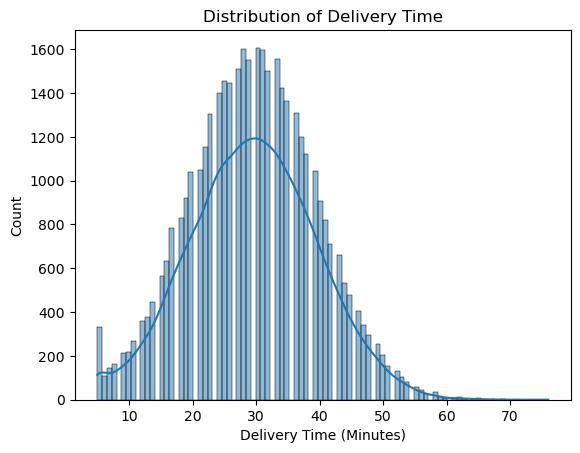

In [103]:
#1.1. Delivery Time Distribution
sns.histplot(df['Delivery Time (Minutes)'], kde=True)
plt.title("Distribution of Delivery Time")
plt.show()

Text(0.5, 1.0, 'Delivery Speed Comparison Across Platforms')

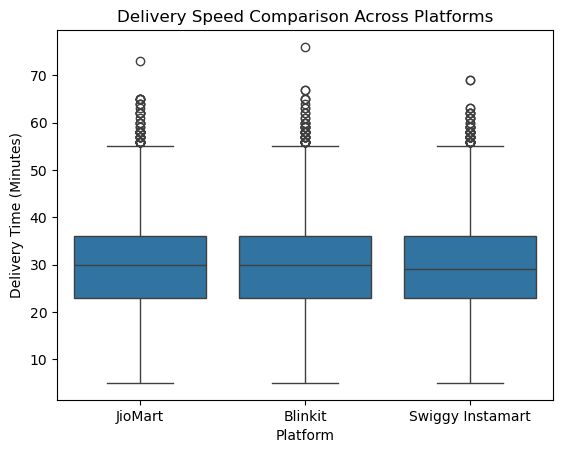

In [104]:
#1.2. Delivery Time vs Platform
sns.boxplot(x='Platform', y='Delivery Time (Minutes)', data=df)
plt.title("Delivery Speed Comparison Across Platforms")
# almost same

Text(0.5, 1.0, 'Relationship Between Order Time and Delivery Speed')

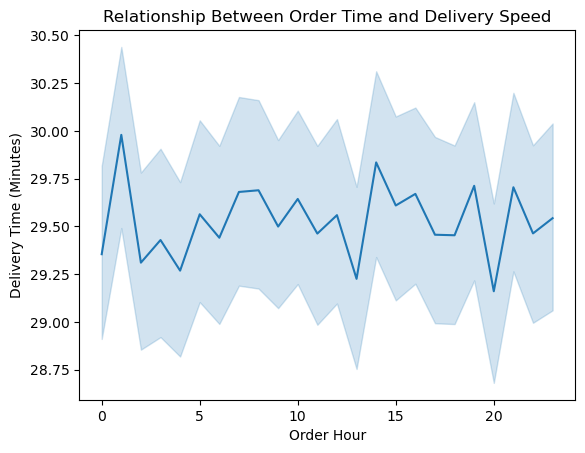

In [105]:
#1.3. Order Hour vs Delivery Time
sns.lineplot(x='Order Hour', y='Delivery Time (Minutes)', data=df)
plt.title("Relationship Between Order Time and Delivery Speed")


Text(0.5, 1.0, 'Delay Occurrence by Product Category')

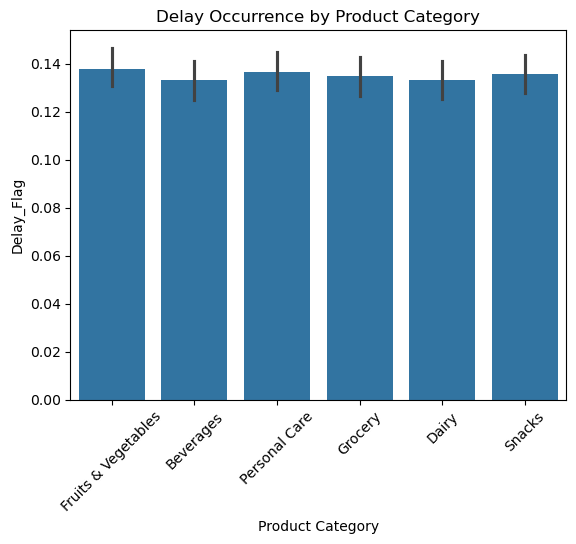

In [106]:
#1.4. Delivery Delay Rate by Category
sns.barplot(x='Product Category', y='Delay_Flag', data=df)
plt.xticks(rotation=45)
plt.title("Delay Occurrence by Product Category")
#almost same but fruits and vegetables and personal care take a bit more


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [108]:

features = ['Order Hour', 'Order Week', 'Fast Delivery','Order Month', 'Order Value (INR)']
X = df[features]
y = df['Delay_Flag']
le=LabelEncoder()
X['Order Month']=le.fit_transform(X['Order Month'])
X['Fast Delivery']=le.fit_transform(X['Fast Delivery'])

In [109]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
model = RandomForestClassifier()

In [111]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [112]:

y_pred = model.predict(X_test)

In [ ]:
order_hour = int(input("Enter Order Hour (0-23): "))
order_week = int(input("Enter Week Number (1-52): "))
Fast_delivery=int(input("Enter 0 or 1"))
order_month = int(input("Enter Month Number (1-12): "))
order_value = float(input("Enter Order Value (INR): "))


'order_hour = int(input("Enter Order Hour (0-23): "))\norder_week = int(input("Enter Week Number (1-52): "))\nFast_delivery=int(input("Enter 0 or 1"))\norder_month = int(input("Enter Month Number (1-12): "))\norder_value = float(input("Enter Order Value (INR): "))\n'

In [ ]:
new_order = pd.DataFrame([{
    'Order Hour': order_hour,
    'Order Week': order_week,
    'Fast Delivery':Fast_delivery,
    'Order Month': order_month,
    'Order Value (INR)': order_value
}])
print(order_hour,order_week,Fast_delivery,order_month,order_value)

"new_order = pd.DataFrame([{\n    'Order Hour': order_hour,\n    'Order Week': order_week,\n    'Fast Delivery':Fast_delivery,\n    'Order Month': order_month,\n    'Order Value (INR)': order_value\n}])\nprint(order_hour,order_week,Fast_delivery,order_month,order_value)"

In [ ]:
prediction = model.predict(new_order)
print("\n Model Prediction:")
print("Delivery Status: ", "Delayed" if prediction[0] == 1 else "On Time")

'prediction = model.predict(new_order)\nprint("\n Model Prediction:")\nprint("Delivery Status: ", "Delayed" if prediction[0] == 1 else "On Time")'

### Objective 2: Platform Performance Comparison Goal

In [116]:
platform_analysis = df.groupby('Platform').agg({
    'Delivery Time (Minutes)': 'mean',
    'Delay_Flag': 'mean',
    'Service Rating': 'mean',
    'Refund Requested': lambda x: (x == "Yes").mean(),
    'Order ID': 'count'
})
platform_analysis=platform_analysis.rename(columns={
    'Delivery Time (Minutes)': 'Avg Delivery Time',
    'Delay_Flag': 'Delay Rate',
    'Service Rating': 'Avg Customer Rating',
    'Refund Requested': 'Refund Rate',
    'Order ID': 'Total Orders'
})

platform_analysis.sort_values('Avg Delivery Time')


,Avg Delivery Time,Delay Rate,Avg Customer Rating,Refund Rate,Total Orders
Platform,,,,,
Swiggy Instamart,29.484610,0.136787,3.234159,0.459009,13320
Blinkit,29.501345,0.131390,3.237220,0.459268,13380
JioMart,29.602377,0.137915,3.258194,0.454016,13211


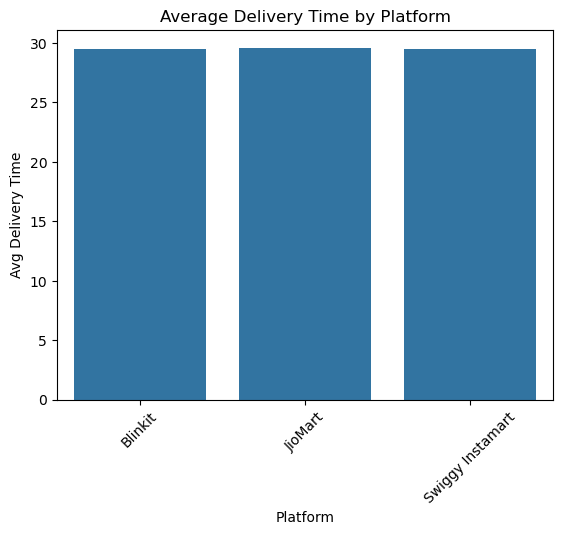

In [117]:


sns.barplot(x=platform_analysis.index, y="Avg Delivery Time", data=platform_analysis)
plt.xticks(rotation=45)
plt.title("Average Delivery Time by Platform")
plt.show()


In [118]:
df["Platform"].value_counts()

Platform
Blinkit             13380
Swiggy Instamart    13320
JioMart             13211
Name: count, dtype: int64

### 3rd Objective Sentiment Analysis based on Customer FeedBack


In [119]:
df['Clean_Feedback'] = df['Customer Feedback'].str.lower()
positive_words = [
    "fast","quick","happy","great","good","excellent","love","awesome",
    "fresh","perfect","nice","helpful","smooth","amazing","satisfied"
]
negative_words = [
    "late","bad","worst","not happy","refund","missing","angry",
    "broken","damaged","delay","slow","poor","hate","problem",
    "disappointed","not good","not"
]


In [120]:
def check_sentiment(text):
    text = text.lower()
    pos = sum(1 for word in positive_words if word in text)
    neg = sum(1 for word in negative_words if word in text)
    
    if pos > neg:
        return "Satisfied"
    elif neg > pos:
        return "Not Satisfied"
    else:
        return "Neutral"

df['Predicted_Sentiment'] = df['Clean_Feedback'].apply(check_sentiment)


In [121]:
user_input = input("Enter customer feedback: ").lower()

result = check_sentiment(user_input)
print("\nPrediction:", result)



Prediction: Satisfied


### Objective 4:Predict whether a customer will request a refund based on customer reaction, service rating, and delivery delay

In [122]:
df['Predicted_Sentiment'] = df['Clean_Feedback'].apply(check_sentiment)
sentiment_counts = df['Predicted_Sentiment'].value_counts()

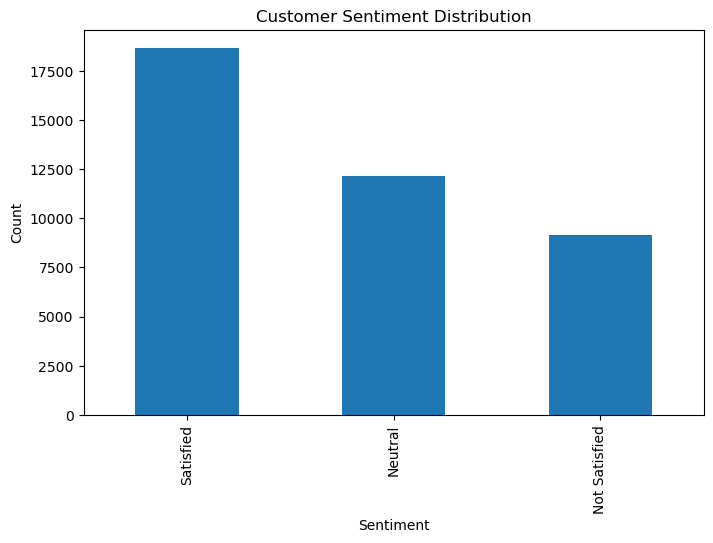

In [123]:
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar')
plt.title("Customer Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

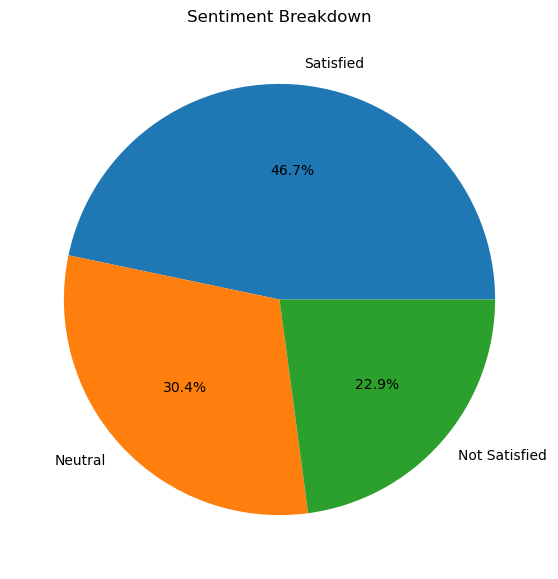

In [124]:
plt.figure(figsize=(7,7))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Breakdown")
plt.ylabel("")  
plt.show()

In [125]:
sentiment_map = {
    "Neutral": 0,
    "Not Satisfied": 1,
    "Satisfied": 2
}

df['Sentiment_Encoded'] = df['Predicted_Sentiment'].map(sentiment_map)

le = LabelEncoder()
df["Delivery Delay"]=le.fit_transform(df["Delivery Delay"])
df["Refund Requested"]=le.fit_transform(df["Refund Requested"])
df.columns.tolist()

['Order ID',
 'Customer ID',
 'Platform',
 'Order Date & Time',
 'Delivery Time (Minutes)',
 'Product Category',
 'Order Value (INR)',
 'Customer Feedback',
 'Service Rating',
 'Delivery Delay',
 'Refund Requested',
 'Order Date',
 'Order Time',
 'Order Hour',
 'Order Day',
 'Order Month',
 'Order Week',
 'Delay_Flag',
 'Fast Delivery',
 'Clean_Feedback',
 'Predicted_Sentiment',
 'Sentiment_Encoded']

In [126]:
X = df[['Sentiment_Encoded', 'Service Rating', 'Delivery Delay']]
y = df['Refund Requested']   # 0 = No, 1=Yes


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [129]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[4354    0]
 [   0 3629]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4354
           1       1.00      1.00      1.00      3629

    accuracy                           1.00      7983
   macro avg       1.00      1.00      1.00      7983
weighted avg       1.00      1.00      1.00      7983



In [130]:
def predict_refund(feedback, service_rating, delivery_delay):
    feedback_clean = feedback.lower()
    sentiment = check_sentiment(feedback_clean)
    sentiment_encoded = sentiment_map[sentiment]
    input_data = [[sentiment_encoded, service_rating, delivery_delay]]
    prediction = model.predict(input_data)[0]
    if prediction == 1:
        return f"Prediction: REFUND will be requested ({sentiment} customer)"
    else:
        return f"Prediction: NO refund will be requested ({sentiment} customer)"


In [131]:
feedback = input("Enter customer feedback: ")
service_rating = float(input("Enter service rating (1-5): "))
delivery_delay = int(input("Enter delivery delay in days: "))
result = predict_refund(feedback, service_rating, delivery_delay)
print(result)

Prediction: NO refund will be requested (Satisfied customer)


### Objective 5: Identify when most orders are placed on which Time(Peak Delivery Hours)

In [133]:
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,...,Order Time,Order Hour,Order Day,Order Month,Order Week,Delay_Flag,Fast Delivery,Clean_Feedback,Predicted_Sentiment,Sentiment_Encoded
0,ORD000001,CUST2824,JioMart,2025-12-07 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,0,...,19:29:30,19,Sunday,December,49,0,True,"fast delivery, great service!",Satisfied,2
1,ORD000003,CUST5506,JioMart,2025-12-07 21:29:30,25,Beverages,599,Items missing from order.,2,0,...,21:29:30,21,Sunday,December,49,0,True,items missing from order.,Not Satisfied,1
2,ORD000004,CUST5012,JioMart,2025-12-07 19:29:30,42,Beverages,946,Items missing from order.,2,1,...,19:29:30,19,Sunday,December,49,1,False,items missing from order.,Not Satisfied,1
3,ORD000007,CUST2679,JioMart,2025-12-07 22:29:30,22,Personal Care,1693,"Fast delivery, great service!",5,0,...,22:29:30,22,Sunday,December,49,0,True,"fast delivery, great service!",Satisfied,2
4,ORD000010,CUST7912,JioMart,2025-12-07 08:29:30,51,Grocery,1279,"Very late delivery, not happy.",2,1,...,08:29:30,8,Sunday,December,49,1,False,"very late delivery, not happy.",Not Satisfied,1


In [134]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time_Of_Day'] = df['Order Hour'].apply(time_of_day)


In [137]:
print(df['Time_Of_Day'].value_counts())


Time_Of_Day
Night        13478
Morning      11611
Afternoon     8095
Evening       6727
Name: count, dtype: int64


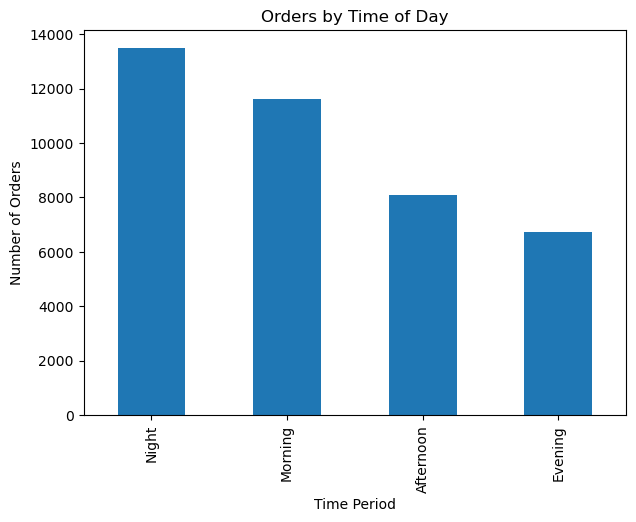

In [138]:
df['Time_Of_Day'].value_counts().plot(kind='bar', figsize=(7,5))
plt.title("Orders by Time of Day")
plt.xlabel("Time Period")
plt.ylabel("Number of Orders")
plt.show()


# Thank You For Visiting
### by-Anchal Shukla ,12310866

